#IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (12, 8)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import io, os

import missingno as miss

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline

from google.colab import drive

In [2]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# LEITURA DO DATASET

In [3]:
drive = '/content/drive/MyDrive/Mestrado/ids_datasets/nsl-kdd/'

In [ ]:
# csvs = os.listdir(drive)
# csvs

['nsl-kdd.ipynb',
 'KDDTrain+.txt',
 'KDDTest+.txt',
 'nsl-kdd_0.csv',
 'nsl-kdd_1.csv',
 'nsl-kdd_2.csv',
 'nsl-kdd_3.csv']

In [ ]:
# total_rows=0
# for csv in csvs:
#     data = pd.read_csv(drive + csv)
#     total_rows+=len(data)
#     print(f'O arquivo {csv} tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
#     print(f'Total esperado de linhas: {total_rows}')

O arquivo nsl-kdd.ipynb tem 0 linhas e 8105 colunas.
Total esperado de linhas: 0
O arquivo KDDTrain+.txt tem 125972 linhas e 43 colunas.
Total esperado de linhas: 125972
O arquivo KDDTest+.txt tem 22543 linhas e 43 colunas.
Total esperado de linhas: 148515


In [4]:
df = pd.read_csv(os.path.join(drive, 'KDDTrain+.txt'))

In [5]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
# df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
40041,0,tcp,private,S0,0,0,0,0,0,0,...,0.030,0.080,0.000,0.000,1.000,1.000,0.000,0.000,neptune,21
33292,0,tcp,http,SF,155,7594,0,0,0,0,...,1.000,0.000,1.000,0.250,0.000,0.000,0.000,0.000,normal,21
65085,60,tcp,telnet,SF,86,183,0,0,0,0,...,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,rootkit,4
82935,0,tcp,imap4,S0,0,0,0,0,0,0,...,0.040,0.060,0.000,0.000,1.000,1.000,0.000,0.000,neptune,20
12456,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,1.000,1.000,0.000,0.000,neptune,18
81533,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.000,0.000,0.000,0.000,0.000,0.000,0.060,0.060,back,12
37130,0,udp,private,SF,28,0,0,3,0,0,...,0.110,0.010,0.110,0.000,0.000,0.000,0.000,0.000,teardrop,15
88779,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.030,0.060,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
69569,0,tcp,http,SF,240,2102,0,0,0,0,...,1.000,0.000,0.090,0.090,0.000,0.000,0.000,0.000,normal,21
8881,0,tcp,private,S0,0,0,0,0,0,0,...,0.030,0.070,0.010,0.000,1.000,1.000,0.000,0.000,neptune,18


In [ ]:
# df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


# Início de Pré-processamento

In [ ]:
# print(df.duplicated().sum())

0


In [ ]:
# df = df.drop_duplicates()

In [ ]:
# print(df.duplicated().sum())

0


In [ ]:
# # Lista para armazenar nomes das colunas que estão completamente vazias
# empty_cols=[]

# # Itera sobre cada coluna do dataframe
# for col in df.columns:
#   if df[col].isnull().all():
#     empty_cols.append(col)
#     if len(empty_cols == []):
#       df.fillna(0, inplace=True)

# print(f'Colunas vazias: {empty_cols}')

Colunas vazias: []


In [ ]:
# nan_count = df.isna().any(axis=1).sum()
# print(f"Número de linhas com pelo menos um NaN: {nan_count}")

Número de linhas com pelo menos um NaN: 0


In [ ]:
# # Contar o número de NaN por coluna
# nan_count_per_column = df.isna().sum()
# print("Número de NaN por coluna:")
# print(nan_count_per_column)

Número de NaN por coluna:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate    

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df = df.loc[:, df.nunique() > 1]

In [ ]:
# df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [ ]:
# len(df.columns)

42

In [ ]:
# def unique_vals(df, columns):
#   for col_name in columns:
#     print(f"Colunas: {col_name}\n{'-'*30}")
#     unique_vals = df[col_name].unique()
#     len_unique_vals = len(unique_vals)
#     value_counts = df[col_name].value_counts()

#     print(f'Valores Unicos: {len_unique_vals}\n')
#     print(f"Value Counts: {value_counts}\n{'='*40}\n")

# columns = df.columns.to_list()
# unique_vals(df, columns)

Colunas: duration
------------------------------
Valores Unicos: 2981

Value Counts: duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64

Colunas: protocol_type
------------------------------
Valores Unicos: 3

Value Counts: protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Colunas: service
------------------------------
Valores Unicos: 70

Value Counts: service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

Colunas: flag
------------------------------
Valores Unicos: 11

Value Counts: flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          36

In [ ]:
# categ_feat = df.select_dtypes(include=['object']).columns
# unique_vals(df, categ_feat)

Colunas: protocol_type
------------------------------
Valores Unicos: 3

Value Counts: protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Colunas: service
------------------------------
Valores Unicos: 70

Value Counts: service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

Colunas: flag
------------------------------
Valores Unicos: 11

Value Counts: flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

Colunas: attack
------------------------------
Valores Unicos: 23

Value Counts: attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep     

In [ ]:
# list_feat=[]
# for feats in categ_feat:
#   list_feat.append(feats)
#   len_feat = len(list_feat)

# print(f'Atributos categóricos: {list_feat}\n')
# print(f'Tamanho: {len_feat}')

Atributos categóricos: ['protocol_type', 'service', 'flag', 'attack']

Tamanho: 4


In [ ]:
# numeric_feats = df.select_dtypes(include=['float64', 'int64']).columns
# unique_vals(df, numeric_feats)

Colunas: duration
------------------------------
Valores Unicos: 2981

Value Counts: duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64

Colunas: src_bytes
------------------------------
Valores Unicos: 3341

Value Counts: src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64

Colunas: dst_bytes
------------------------------
Valores Unicos: 9326

Value Counts: dst_bytes
0        67966
105       1497
8314       888
330        528
331        512
         ...  
30114        1
3885         1
33116        1
4056         1
52866        1
Name: count, Length: 9326, dtype: int64

Colunas: land
------------------------------
Valores Unicos: 2

Value Counts: land
0 

In [ ]:
# list_feat_num=[]
# for feats in numeric_feats:
#   list_feat_num.append(feats)
#   len_feat_num = len(list_feat_num)

# print(f'Atributos numéricos: {list_feat_num}\n')
# print(f'Tamanho: {len_feat_num}')

Atributos numéricos: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']

Tamanho: 39


In [6]:
df['attack']

,attack
0,normal
1,neptune
2,normal
3,normal
4,neptune
...,...
125967,neptune
125968,normal
125969,normal
125970,neptune


In [13]:
#Attack = Label
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [12]:
len(df['attack'].unique()) -1  #normal

22

In [14]:
attack_n = list()
attack_n = ['normal' if i == 'normal' else 'anomaly' for i in df.attack]
len(attack_n)

125972

In [15]:
normal_count = anomaly_count = 0
for k in attack_n:
  if k == 'normal':
    normal_count +=1
  else:
    anomaly_count +=1
print(f"normal_count: {normal_count}")
print(f"anomaly_count: {anomaly_count}")

normal_count: 67342
anomaly_count: 58630


In [16]:
df_label_count = df.groupby('attack').size().reset_index(name='count')
df_label_count.columns = ['attack', 'count']

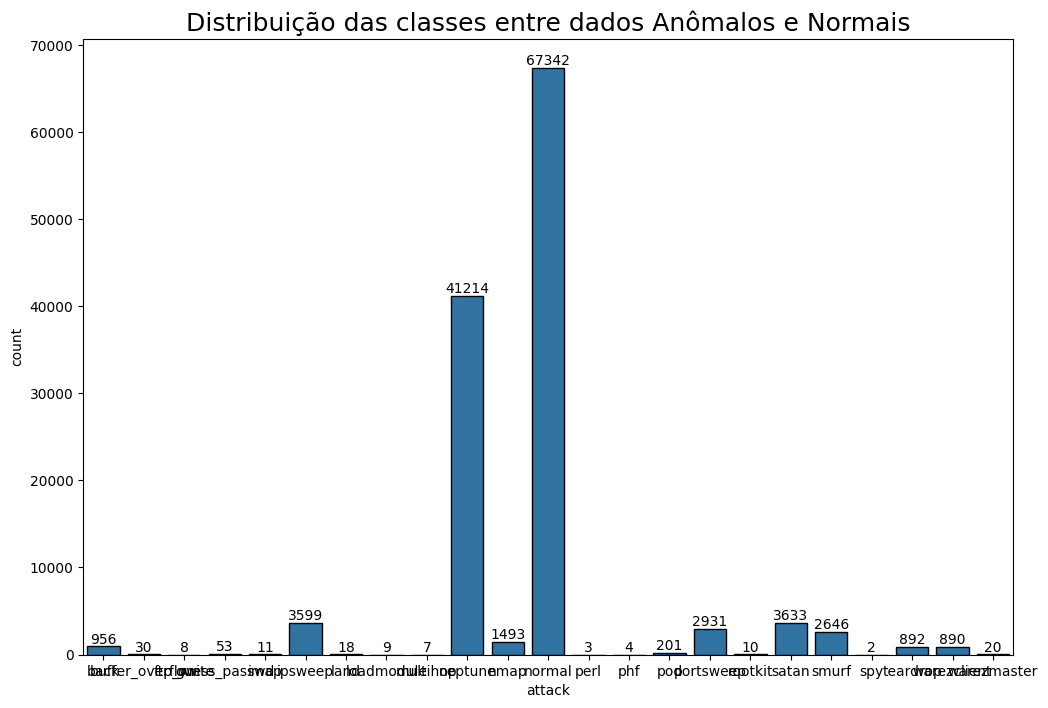

In [17]:
ax = sns.barplot(
    data = df_label_count,
    x= 'attack',
    y= 'count',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
          fontdict={'fontsize':18})

for container in ax.containers:
   ax.bar_label(container)

In [18]:
count_val0 = df_label_count[df_label_count['attack'] == 'normal']['count'].iloc[0]
count_val1 = df_label_count[df_label_count['attack'] == 'anomaly']['count'].iloc[0]

print(f'Proporção de Classes:\n')
print(f'Instâncias normais: {count_val0/len(df)*100:.2f}%')
print(f'Instâncias anômalas: {count_val1/len(df)*100:.2f}%')

IndexError: single positional indexer is out-of-bounds

In [19]:
df['attack'] = attack_n
df['attack']

,attack
0,normal
1,anomaly
2,normal
3,normal
4,anomaly
...,...
125967,anomaly
125968,normal
125969,normal
125970,anomaly


In [20]:
df['attack'].unique()

array(['normal', 'anomaly'], dtype=object)

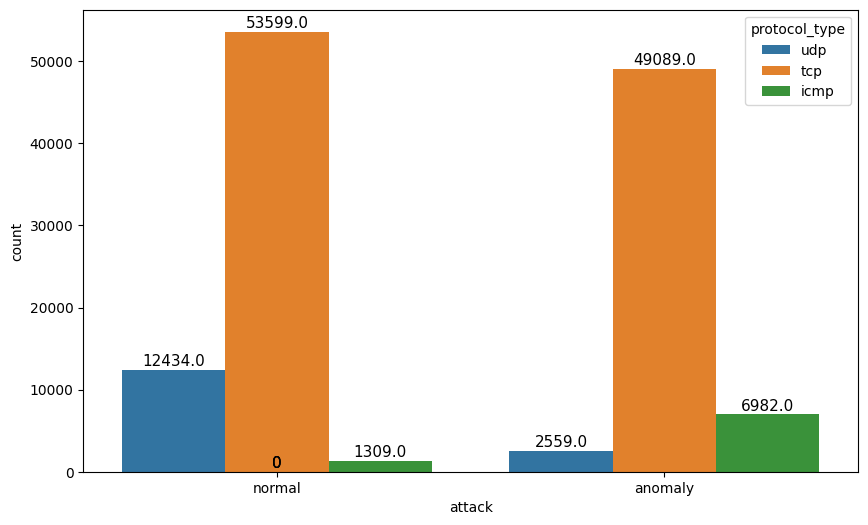

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='attack',
              hue='protocol_type')
# Adicionar números no topo de cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline',
                       fontsize=11, color='black', xytext=(0, 3),
                       textcoords='offset points')

In [ ]:
df['attack'] = df['attack'].map({'normal': 0, 'anomaly': 1})

In [ ]:
df['attack']

,attack
0,0
1,1
2,0
3,0
4,1
...,...
125967,1
125968,0
125969,0
125970,1


In [ ]:
df_filtered = df[['protocol_type', 'service', 'flag']]
df_filtered

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ
...,...,...,...
125967,tcp,private,S0
125968,udp,private,SF
125969,tcp,smtp,SF
125970,tcp,klogin,S0


#Label Encoder

In [ ]:
le=preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag']
for x in clm:
    df[x]=le.fit_transform(df[x])

In [ ]:
X = df.drop(["attack"], axis=1)
y = df["attack"]

In [ ]:
len(X.columns)

41

#Divisão dos dados em Treinamento e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# Feature Engineering

In [ ]:
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = train_index
# mutual_info.sort_values(ascending=False)

,0
src_bytes,0.566
service,0.468
dst_bytes,0.439
flag,0.367
same_srv_rate,0.365
diff_srv_rate,0.362
dst_host_srv_count,0.336
dst_host_same_srv_rate,0.310
logged_in,0.290
dst_host_serror_rate,0.284


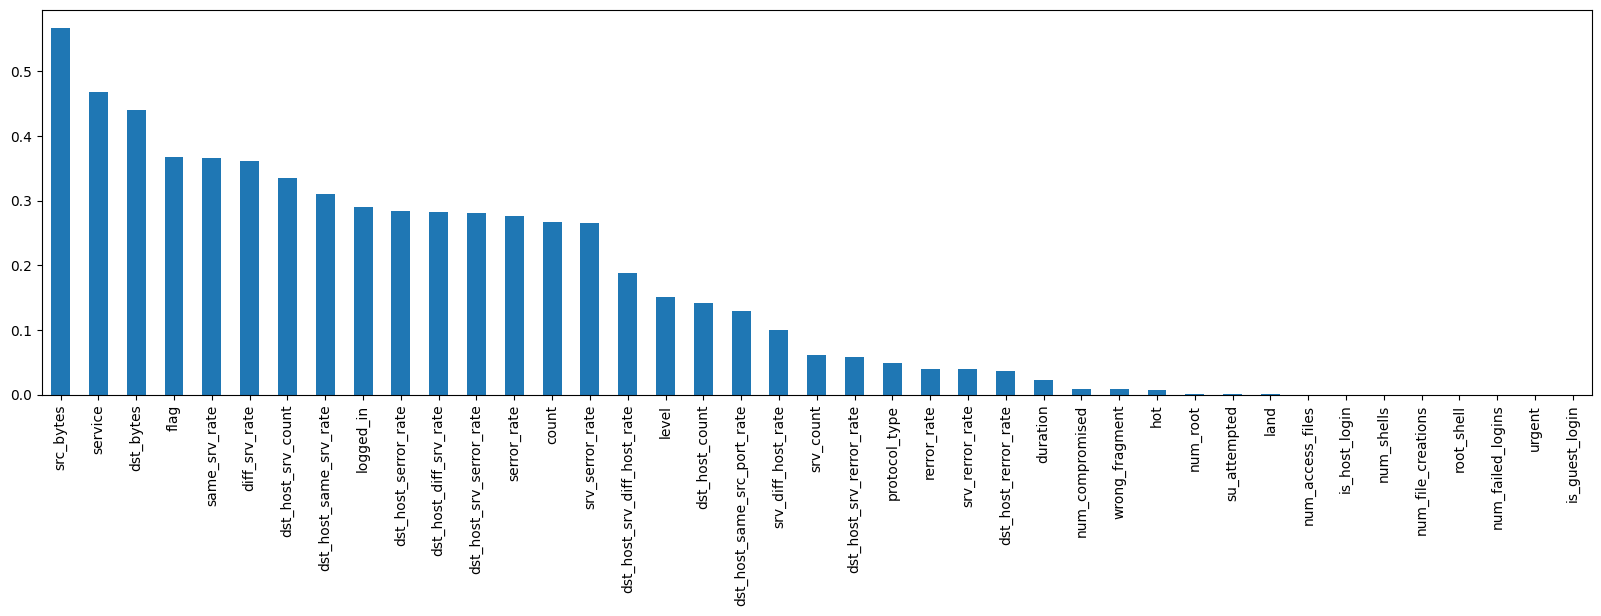

In [ ]:
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

#Feature Selection


In [ ]:
# Select_features = SelectKBest(mutual_info_classif, k=30)
# Select_features.fit(X_train, y_train)
# train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [ ]:
best_features=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate','attack']

In [ ]:
df=df[best_features]
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,attack
43394,0,0,14,9,8,0,0,0,0,0,1,11,0.000,0.000,0.000,1
15948,0,1,24,9,234,11864,0,0,1,0,1,1,0.000,0.000,0.000,0
60758,0,1,49,5,0,0,0,0,0,0,7,3,1.000,1.000,0.000,1
92762,1,1,54,9,1923,332,0,0,1,0,1,1,0.000,0.000,0.000,0
110110,0,1,59,5,0,0,0,0,0,0,266,24,1.000,1.000,0.000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   duration         125972 non-null  int64  
 1   protocol_type    125972 non-null  int64  
 2   service          125972 non-null  int64  
 3   flag             125972 non-null  int64  
 4   src_bytes        125972 non-null  int64  
 5   dst_bytes        125972 non-null  int64  
 6   wrong_fragment   125972 non-null  int64  
 7   hot              125972 non-null  int64  
 8   logged_in        125972 non-null  int64  
 9   num_compromised  125972 non-null  int64  
 10  count            125972 non-null  int64  
 11  srv_count        125972 non-null  int64  
 12  serror_rate      125972 non-null  float64
 13  srv_serror_rate  125972 non-null  float64
 14  rerror_rate      125972 non-null  float64
 15  attack           125972 non-null  int64  
dtypes: float64(3), int64(13)
memory usage:

#TESTE para outliers

In [ ]:
# # Definir limites de IQR
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

In [ ]:
# # Filtrar outliers
# df_sem_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(f"Shape antes da remoção: {df.shape}, Shape após remoção: {df_sem_outliers.shape}")

Shape antes da remoção: (125972, 16), Shape após remoção: (52383, 16)


In [ ]:
attack = df['attack'].to_list()
attack

[0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


In [ ]:
normal_count = anomaly_count = 0
for k in attack:
  if k == 0:
    normal_count +=1
  else:
    anomaly_count +=1
print(f"normal_count: {normal_count}")
print(f"anomaly_count: {anomaly_count}")

normal_count: 67342
anomaly_count: 58630


#Gerando o dataset com as colunas categoricas e numericas
#Sem ter feito StandarScaler()

In [ ]:
# Dividir em chunks
chunk_size = 31493  # Número de linhas por chunk
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df.iloc[chunk:chunk+chunk_size].to_csv(f"/content/drive/MyDrive/Mestrado/ids_datasets/nsl-kdd/nsl-kdd_{i}.csv", index=False)

In [ ]:
df['attack']

,attack
0,0
1,1
2,0
3,0
4,1
...,...
125967,1
125968,0
125969,0
125970,1


<Figure size 1200x1000 with 0 Axes>

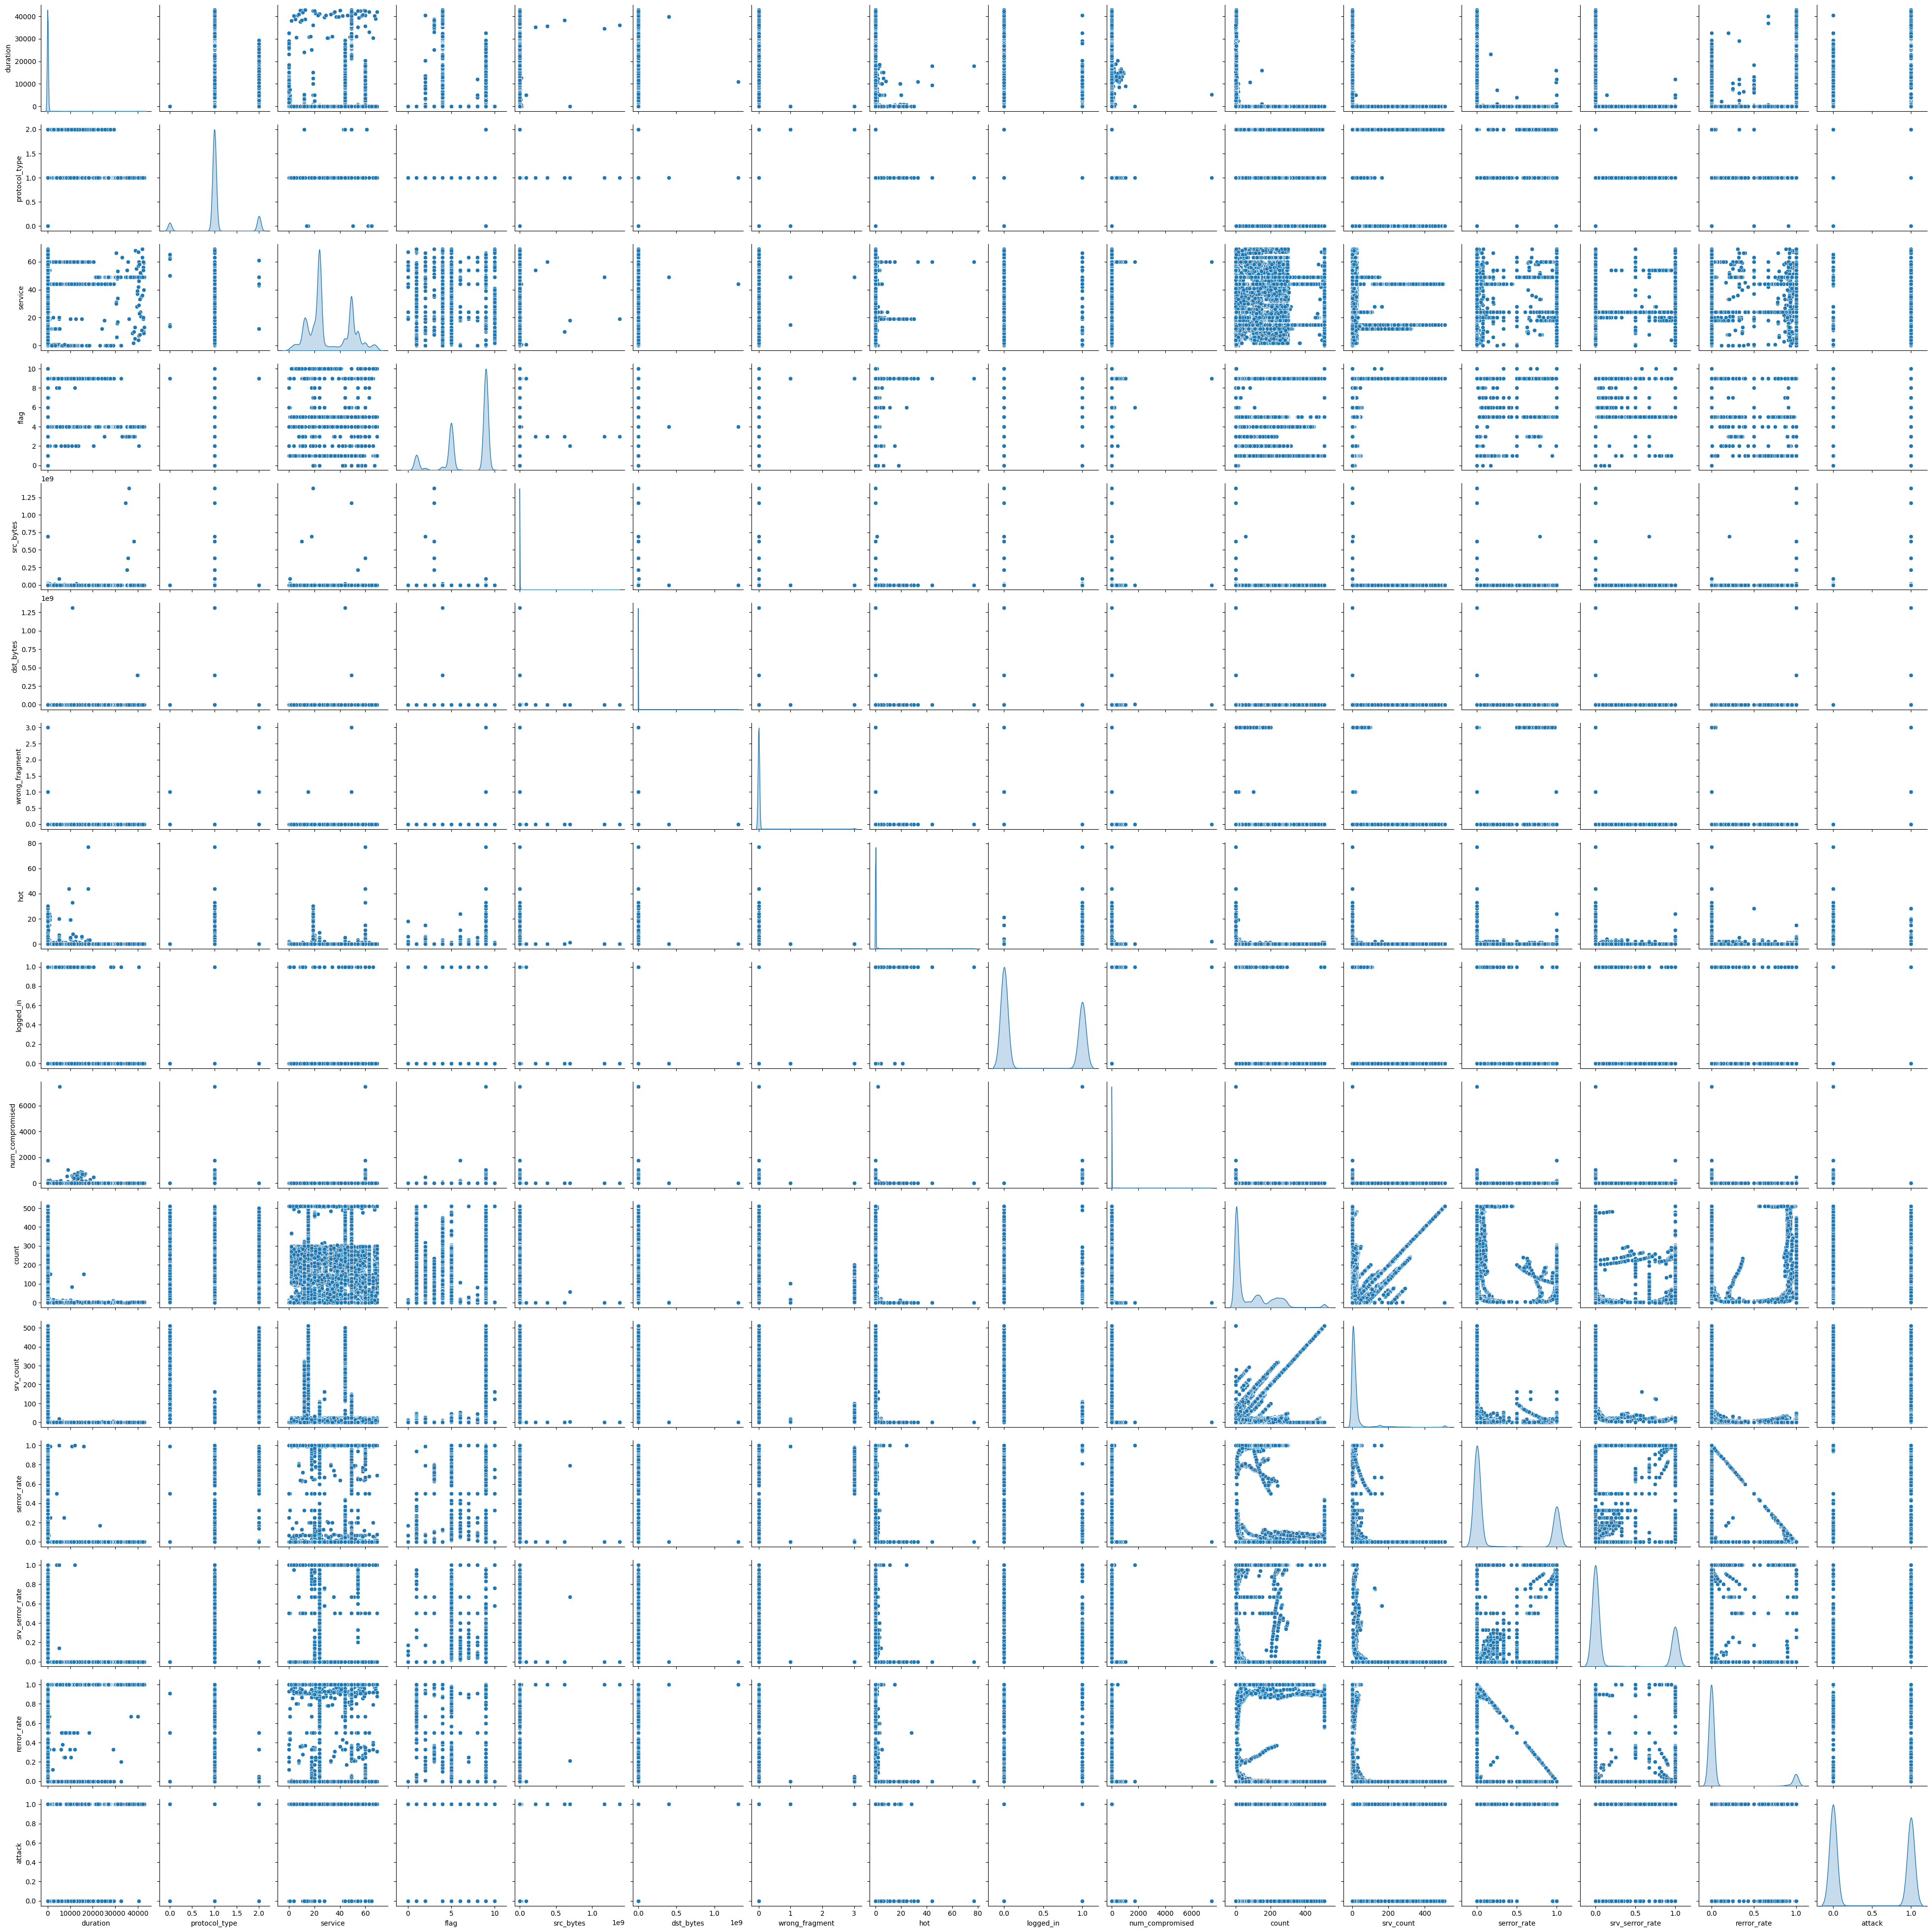

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(
    df,
    diag_kind="kde",
    palette = ["blue","darkorange"]
)
plt.show()

#Etapa de Padronização


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_scale_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scale_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,-0.110,2.219,0.781,0.751,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,-1.036,-1.161,2.737,2.368,-0.289,-0.640,-0.625,-0.388,-0.376,-1.966
1,-0.110,-0.125,1.087,-0.736,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,-0.810,-0.938,-0.174,-0.480,-0.289,1.609,1.619,-0.388,-0.376,-0.220
2,-0.110,-0.125,-0.442,0.751,-0.008,-0.003,-0.014,-0.089,-0.008,-0.095,...,1.259,1.066,-0.439,-0.383,0.066,-0.572,-0.602,-0.388,-0.345,0.653
3,-0.110,-0.125,-0.442,0.751,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,1.259,1.066,-0.439,-0.480,-0.289,-0.640,-0.625,-0.388,-0.376,0.653
4,-0.110,-0.125,1.087,-2.224,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,-0.873,-1.005,-0.069,-0.480,-0.289,-0.640,-0.625,2.874,2.754,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,-0.110,-0.125,1.087,-0.736,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,-0.819,-0.938,-0.121,-0.480,-0.289,1.609,1.619,-0.388,-0.376,0.216
125968,-0.107,2.219,1.087,0.751,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,1.159,0.977,-0.386,-0.448,-0.289,-0.640,-0.625,-0.388,-0.376,0.653
125969,-0.110,-0.125,1.393,0.751,-0.007,-0.005,-0.014,-0.089,-0.008,-0.095,...,-0.774,-0.894,-0.121,-0.480,-0.289,0.979,-0.625,-0.355,-0.376,-0.656
125970,-0.110,-0.125,-0.075,-0.736,-0.008,-0.005,-0.014,-0.089,-0.008,-0.095,...,-0.972,-1.094,-0.174,-0.480,-0.289,1.609,1.619,-0.388,-0.376,0.216


#Classificação


#Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_df, y, test_size=0.3, random_state=0)

#Aplicação do Algoritmos

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

--------Applying AdaBoostClassifier Classifier ----------


In [ ]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 89.66183319221, 85.95141487063287, 92.929580674567, 89.30438829423198), ('KNN ', 99.81477561388654, 99.74391076712953, 99.85756608933455, 99.80070606992369), ('RF ', 99.91532599491956, 99.8463639467395, 99.97151321786691, 99.90889939076467), ('AB ', 98.44940728196444, 98.47982626585896, 98.17684594348222, 98.32810271041369), ('LogR ', 97.80641405588484, 97.11500535301741, 98.19393801276209, 97.65149154366979), ('DT ', 99.82006773920406, 99.80628988149499, 99.80628988149499, 99.80628988149499)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0         1          2       3         4
0          LR                                       
1  Classifier  Accurary  Precision  Recall  F1-Score
2         NB     89.662     85.951  92.930    89.304
3        KNN     99.815     99.744  99.858